## This is Hayden's notebook. I'll only keep the changes I made throughout this assigment.. which was a lot.

# Introduction - Yab has his own, I just clarified a few points:

## In this project, we aim to use a **thorough** data-driven approach to determine Pittsburgh's best neighborhood. In order to do this, we have developed a metric that takes into account important characteristics from several datasets, such as "arrest.csv," "fire.csv," and "play.csv." Our method combines recreational and safety factors to create a thorough assessment of neighborhood desirability; however, heavy emphasis is weighted upon safety.

### Safety is the number 1 metric for us because it controls if you're... safe!

#### Our motivation is to provide the best analysis on the safest neighborhood in Pittsburgh, Pennsylvania such that families can sleep sound and safe knowing they have #TeamSafety on their side.

## **First**, we have to import our libraries and set out datasets

## Yab imported the data as his own, you can check the change logs, I just formatted it to be more pleasing / readable

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
arrestData = pd.read_csv("ArrestData.csv", index_col="_id")
fireData = pd.read_csv("FireData.csv", index_col="_id")
playData = pd.read_csv("PlayData.csv", index_col="_id")

#### We also want to check what data each dataset has.. this was mine

In [4]:
print("Arrest Data:")
print(arrestData.columns)
    
print("\nFire Data:")
print(fireData.columns)

print("\nPlay Data:")
print(playData.columns)

Arrest Data:
Index(['PK', 'CCR', 'AGE', 'GENDER', 'RACE', 'ARRESTTIME', 'ARRESTLOCATION',
       'OFFENSES', 'INCIDENTLOCATION', 'INCIDENTNEIGHBORHOOD', 'INCIDENTZONE',
       'INCIDENTTRACT', 'COUNCIL_DISTRICT', 'PUBLIC_WORKS_DIVISION', 'X', 'Y'],
      dtype='object')

Fire Data:
Index(['call_no', 'incident_type', 'type_description', 'address', 'alarms',
       'alarm_time', 'primary_unit', 'census_tract', 'neighborhood',
       'council_district', 'ward', 'tract', 'public_works_division',
       'pli_division', 'police_zone', 'fire_zone', 'latitude', 'longitude'],
      dtype='object')

Play Data:
Index(['id', 'name', 'equipment_type', 'manufacturer', 'safety_surface_type',
       'ada_accessible', 'street_number', 'street', 'neighborhood',
       'council_district', 'ward', 'tract', 'public_works_division',
       'pli_division', 'police_zone', 'fire_zone', 'latitude', 'longitude'],
      dtype='object')


# Arrests - 
# I didn't do the neighborhood_arrest plot. That was Yab, however, I changed it to be horizontal.

### Since our goal is to determine the best neighborhood by safety, we decided to look at Arrest data and evaluate it by neighborhood

### So, here are the 5 neighborhoods with the lowest number of arrests

#### The lower, the better :)

# I did all of this though
### These numbers are great in comparison to these 5 townships:

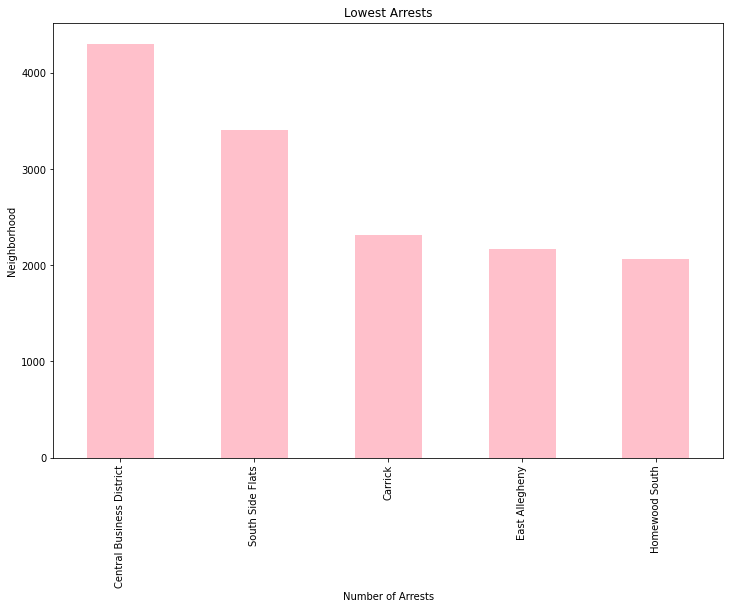

In [29]:
plt.figure(figsize=(12, 8))
neighborhood_arrests.head(5).plot(kind='bar', color='Pink')
plt.title('Lowest Arrests')
plt.xlabel('Number of Arrests')
plt.ylabel('Neighborhood')
plt.show()

#### yikes... the difference between the Highest (Central Business District) and the Lowest (Mt. Oliver) is quite large

## Arrests but the offense is "Propulsion of Missiles"

### Next, we figured that we'd filter for the most heinous of crimes... the propulsion of missiles.

#### Who wants to live in a missile-filled neighborhood?

Anyway, here's the filtered data:

In [7]:
missileData = arrestData['OFFENSES']

offense_code = '2707'
offense = missileData.str.contains(offense_code, na=False)

filtered_data = missileData[offense]
print(filtered_data.head(5))

_id
30     2701 Simple Assault. / 2707 Propulsion of Miss...
62     2707 Propulsion of Missiles  / 3304(a)(5) CRIM...
729    6106 Firearms not to be Carried without a Lice...
730    6106 Firearms not to be Carried without a Lice...
964    2705 Recklessy Endangering Another Person. / 6...
Name: OFFENSES, dtype: object


#### Checking to ensure the arrestData is good:

In [8]:
arrestData.iloc[2398-1][7] # -1 for indexing purposes

'2702 Aggravated Assault. / 2705 Recklessy Endangering Another Person. / 2707 Propulsion of Missiles  / 5503(a)(4) DISORDERLY CONDUCT - HAZARDOUS/PHYS. OFF'

#### Total number of arrests made from offense code 2707 for curiousity purposes

In [9]:
print(offense.sum())

213


### Now, we wanted to graph all the neighborhoods with the propulsion of missiles so we can avoid all of them.

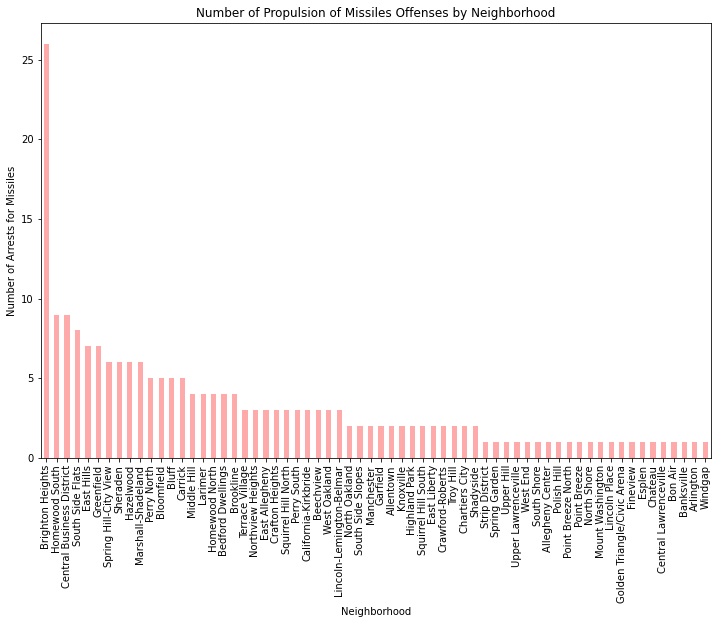

In [10]:
F = arrestData[offense].groupby('INCIDENTNEIGHBORHOOD').size().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
F.plot(kind='bar', color='#FFAAAA')
plt.title('Number of Propulsion of Missiles Offenses by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Arrests for Missiles')
plt.show()

#### What is happening in Brighton Heights?!

# Fire Incidents
# I didn't do the fire incidents graph.

## Our second metric was fire data. The reasoning is fire isn't very safe.

### Another thing to mention is that if you want to buy a house, you don't want that house to burn down.

In [6]:
neighborhood_fires = fireData['neighborhood'].value_counts()


### Why is the mean so high??

In [13]:
averageFires = neighborhood_fires.mean()
print(averageFires)

89.8021978021978


#### I think it's entirely reasonable to assume that neighborhoods with fire incidents above the mean are more likely to have arsonists.

#### The correlation grows with the number of fire incidents above the mean. 

## List of Neighborhoods who probably have Arsonists:

##### *also known as: bad investment neighborhoods*

In [14]:
likelyArsonists = neighborhood_fires[fireData['neighborhood'].value_counts() > averageFires]

print(likelyArsonists)

Carrick                      284
Central Business District    266
South Side Flats             261
Squirrel Hill South          253
Hazelwood                    244
Mount Washington             220
East Liberty                 207
Lincoln-Lemington-Belmar     196
Homewood South               190
Brookline                    189
Shadyside                    183
Homewood North               182
Knoxville                    179
Sheraden                     172
Bloomfield                   172
Perry South                  163
East Hills                   154
Brighton Heights             153
Beechview                    146
Bluff                        143
Marshall-Shadeland           142
East Allegheny               131
Squirrel Hill North          130
Central Northside            130
Beltzhoover                  129
North Oakland                125
Allentown                    125
Larimer                      124
Greenfield                   115
Garfield                     110
Crawford-R

# Number of Playgrounds 
## All of my contributions:

### Okay, okay. We have found the neighborhoods with the lowest arrests and lowest fire incidents. Now, we have to pick a neighborhood based on its playgrounds.

#### After all, the more playgrounds, the safer it is... right?

## Wait a minute...

## South Side Slopes and Squirrel Hill South were also #3 and #4 respectively on the likely arsonists leaderboard...
## *arson isn't very safe*...
### Therefore, there **is** a positive correlation between a higher number of *Fire Incidents* and a higher number of *Playgrounds*
I knew it playgrounds were trouble...

### Re-evaluating...

#### We know that Mt. Oliver had the lowest number of arrests and was the third **and** first in lowest neighborhood per Fire Incidents...

##### let's check how many playgrounds it has...

In [16]:
Olivermask = playData['neighborhood'] == 'Mt. Oliver'

playData[Olivermask].head()

,id,name,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
_id,,,,,,,,,,,,,,,,,,


### It looks like Mt. Oliver has **no** Playgrounds!!

### This adds greater evidence for the correlation between Fire Incidents and Number of Playgrounds!!

# Conclusion
# We worked on this together, he had the first draft of most of the things and I added / modified them.

## **Mt. Oliver** is the top candidate for Pittsburgh's greatest neighborhood, according to our data-driven analysis that uses arrest records, fire occurrences, and has **no** playground availability. Therefore, Mt. Oliver is clearly the safest neighborhood in Pittsburgh. 
## We also believe that the "best" neighborhood is the safest one. This is because safety is the only metric that *really* matters. Afterall, common metrics such as cost of living or good public education really doesn't matter if you're being attacked with missiles or your house burns down.

## This method offers an **unbiased evaluation**, highlighting the neighborhood's superiority in terms of safety and less arson!
### These findings are pretty much **indisputable** to any rational person.
#### And no, we don't care about conflating factors such as "population" or "police bias". We only care about **hard** numbers. As in, what neighborhood has the lowest arrests? Lowest fire incidents? Who cares about "**per capita**"? 

## Hayden's conclusion:
### Personally, I think Mt. Oliver is  by far the safest neighborhood. It has the lowest arrests, absolutely NO propulsions of missiles and is both the first and third in terms of the lowest fire incidents. You really can't beat it. It's just not possible.

![](mark.jpg)